In [144]:
#membuat prediksi kanker payudara menggunakan model klasifikasi machine learning
#sumber data: kaggle.com
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [145]:
dataset = pd.read_csv('data.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [146]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [147]:
#menghapus kolom yang tidak diperlukan dalam analisis
dataset.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

#mengecek apakah ada kolom yang memiliki nilai null
dataset.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [148]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [149]:
#karena data akan diolah dengan metode klasifikasi, maka semua variabel harus memiliki rentang nilai yang sama
#untuk menyama ratakan rentan nilai pada variabel, digunakan MinMaxScaler dari SciKit library.

scaler = MinMaxScaler()
col_scaler = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']
dataset[col_scaler] = scaler.fit_transform(dataset[col_scaler])
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.620776,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.248310,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [150]:
#setelah menjadikan semua variable memiliki rentan nilai yang sama, maka selanjutnya mengubah kolom diagnosi menjadi angka
#karena algoritma Machine Learning bekerja dengan menggunakan nilai numerik
#maka data yang memiliki tipe str harus diubah menjadi data dengan tipe int menggunakan LabelEncoder dari Scikit Library.

LE = LabelEncoder()
dataset['diagnosis'] = LE.fit_transform(dataset['diagnosis'])
dataset.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,0.690000,0.428813,0.678668,0.566490,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.623266,0.383262,0.576174,0.452664,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,0.622320,0.626987,0.604036,0.474019,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.560655,0.699094,0.520892,0.379915,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,0.455251,0.621238,0.445788,0.303118,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.393099,0.589019,0.379949,0.230731,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,0.644564,0.663510,0.665538,0.475716,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.633582,0.730277,0.668310,0.402035,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,0.036869,0.501522,0.028540,0.015907,0.05263,0.04362,0.00000,0.00000,0.1587,...,0.054287,0.489072,0.043578,0.020497,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


0    357
1    212
Name: diagnosis, dtype: int64
1 malignan  2  benign


C:\Users\Rooster\anaconda3\envs\python_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


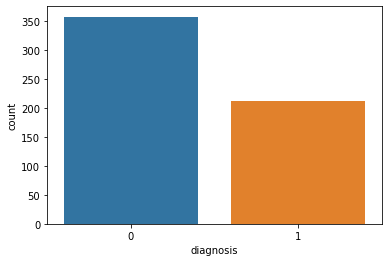

In [151]:
#1 = malignan
#0 = benign
#menghitung banyaknya diagnosis kanker
sns.countplot(dataset['diagnosis'])
print(dataset['diagnosis'].value_counts())
print('1 malignan  2  benign')

In [152]:
#membuat features dan target
#pada data ini, kolum target adalah kolum diagnosis

X = dataset.drop(['diagnosis'], axis=1)
y = dataset['diagnosis']
print('feature: ', X.shape)
print('target: ', y.shape)

feature:  (569, 30)
target:  (569,)


In [153]:
#membagi dataset menjadi train dan test dengan perbandingan 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train',y_train.shape)
print('y_test:',y_test.shape)

X_train: (426, 30)
X_test: (143, 30)
y_train (426,)
y_test: (143,)


In [154]:
#testing
logreg = LogisticRegression()
logreg = logreg.fit(X_train, y_train)
logreg = model.predict(X_test)
print(y_pred.shape)

(143,)


C:\Users\Rooster\anaconda3\envs\python_3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [155]:
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)
print('prediksi ')

Training Accuracy : 0.6408450704225352
Testing Accuracy : 0.6083916083916084

Confusion matrix:
[[81  9]
 [ 3 50]]

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        90
           1       0.85      0.94      0.89        53

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

